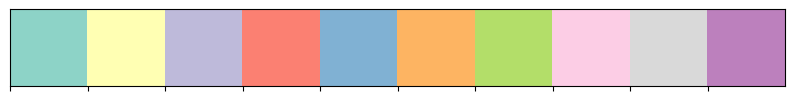

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

pd.set_option('display.max_colwidth', 100)

qualitative_colors = sns.color_palette("Set3", 10)
sns.palplot(qualitative_colors)

path1 = "../data/cleaned/final_patient_df.xlsx"
#path1 = r"C:\Users\ShannonKnight\OneDrive - PPO Serve\Documents\ironhack\Week 3\project_1\data\cleaned\final_patient_df.xlsx"

patient_df = pd.read_excel(path1, na_values='NA')

In [51]:
age_groups = {
    '0-4': ['0', 'Less than 1', '1 to 4'],
    '5-19': ['5 to 9', '10 to 14', '15 to 19'],
    '20-39': ['20 to 24', '25 to 29', '30 to 34', '35 to 39'],
    '40-59': ['40 to 44', '45 to 49', '50 to 54', '55 to 59'],
    '60+': ['60 to 64', '65 to 69', '70 to 74', '75 to 79', '80+']
}

age_mapping = {
    '0': '0-4', 'Less than 1': '0-4', '1 to 4': '0-4',
    '5 to 9': '5-19', '10 to 14': '5-19', '15 to 19': '5-19',
    '20 to 24': '20-39', '25 to 29': '20-39', '30 to 34': '20-39', '35 to 39': '20-39',
    '40 to 44': '40-59', '45 to 49': '40-59', '50 to 54': '40-59', '55 to 59': '40-59',
    '60 to 64': '60+', '65 to 69': '60+', '70 to 74': '60+', '75 to 79': '60+', '80+': '60+'
}

# Map age bands to age groups and add as a new column to the original DataFrame
patient_df['age_group'] = patient_df['age_band'].map(age_mapping)

In [52]:
patient_df.head()

,date_of_birth,age_band,gender,chron_count,plan_type,enrollment_date,unenrollment_date,tarrif_risk_cell,major_segment,minor_segment,...,enrollment_flag,unenrolment_flag,member_age,tariff_code,global_fee,icc_name,anonymised_popid,anonymised_practice_number,age_group_index,age_group
0,1997-07-26,25 to 29,F,0,Emerald Value,2023-06-22 00:00:00,0,not known,not known,not known,...,Y,N,26,989049,154.02,Pretoria North ICC,GEMS00000000000,ah0iche,3.0,20-39
1,1979-06-10,40 to 44,M,2,Emerald Value,2020-01-10 00:00:00,2021-05-21 00:00:00,40 to 44M2Emerald Value,Sig Condition,Significant condition,...,N,Y,44,989077,114.47,Pretoria North ICC,GEMS000000baa00,ccieb,4.0,40-59
2,1946-06-07,70 to 74,F,1,Emerald Value,2019-11-26 00:00:00,2023-02-09 00:00:00,70 to 74F1Emerald Value,At Risk,Lifestyle chronic,...,N,Y,77,989132,162.93,Pretoria North ICC,GEMS000000baa0e,ccieb,5.0,60+
3,1962-04-20,60 to 64,F,2,Emerald,2019-11-08 00:00:00,0,60 to 64F2Emerald,At Risk,Non-life-threatening chronic,...,Y,N,61,989105,131.43,Pretoria North ICC,GEMS000000bcc00,fg0fic,5.0,60+
4,1970-04-06,50 to 54,F,2,Emerald,0,0,50 to 54F2Emerald,not known,not known,...,N,N,53,989089,149.90,Pretoria Central West,GEMS000000bdh00,adigdba,4.0,40-59


In [65]:
patient_df.major_segment.value_counts()

major_segment
not known               73139
Healthy                  2643
Sig Condition            1612
At Risk                  1582
High risk                 363
Not active on scheme      108
Maternity                  59
Name: count, dtype: int64

In [72]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79506 entries, 0 to 79505
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date_of_birth               79506 non-null  datetime64[ns]
 1   age_band                    79506 non-null  object        
 2   gender                      79506 non-null  object        
 3   chron_count                 79506 non-null  int64         
 4   plan_type                   79506 non-null  object        
 5   enrollment_date             79506 non-null  object        
 6   unenrollment_date           79506 non-null  object        
 7   tarrif_risk_cell            79506 non-null  object        
 8   major_segment               79506 non-null  object        
 9   minor_segment               79506 non-null  object        
 10  last_admission_date         79506 non-null  int64         
 11  length_of_stay              79506 non-null  int64     

In [66]:
from scipy.stats import chi2

In [75]:
from scipy.stats import spearmanr

filtered_risk_df.dropna(inplace=True)

age_group_mapping = {'0-4': 1, '5-19': 2, '20-39': 3, '40-59': 4, '60+': 5}
risk_level_mapping = {'Healthy': 1, 'At Risk': 2, 'Maternity': 3, 'Sig Condition': 4, 'High risk': 5}

# Map categorical values to numerical values
filtered_risk_df['age_group_mapped'] = filtered_risk_df['age_group'].map(age_group_mapping)
filtered_risk_df['risk_level_mapped'] = filtered_risk_df['major_segment'].map(risk_level_mapping)

# Calculate Spearman's correlation coefficient
correlation_coefficient, p_value = spearmanr(filtered_risk_df['age_group_mapped'], filtered_risk_df['risk_level_mapped'])

print("Spearman's correlation coefficient:", round(correlation_coefficient,3))
filtered_risk_df.shape

Spearman's correlation coefficient: 0.547


(6258, 26)

<Axes: title={'center': 'Scatter Plot'}, xlabel='age_group_mapped', ylabel='risk_level_mapped'>

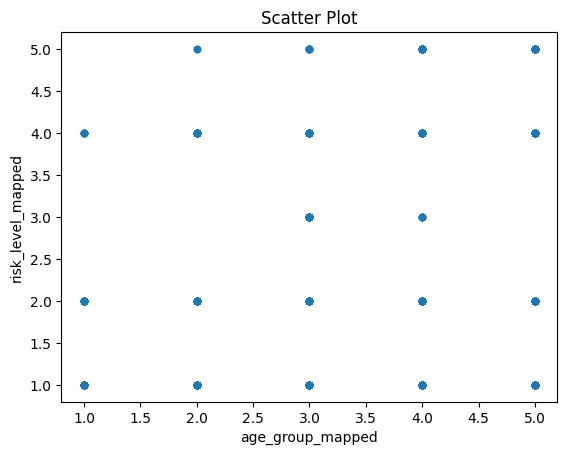

In [68]:
filtered_risk_df.plot(kind='scatter', x='age_group_mapped', y='risk_level_mapped', title='Scatter Plot')

In [70]:
pivot_df = filtered_risk_df.pivot_table(index='risk_level_mapped', columns='age_group_mapped', values=['member_age'], aggfunc='count')
pivot_df

member_age                            
age_group_mapped           1      2      3      4      5
risk_level_mapped                                       
1                      143.0  850.0  829.0  618.0  203.0
2                       35.0  204.0  253.0  563.0  526.0
3                        NaN    NaN   52.0    7.0    NaN
4                        8.0   71.0  156.0  488.0  889.0
5                        NaN    3.0    8.0   94.0  258.0